# Marine Heatwaves Definition

This document describes the `marineHeatWaves` module for python which implements the Marine Heatwave (MHW) definition of Hobday et al. (*manuscript submitted to Progress in Oceanography*). This software is demonstrated by applying the MHW definition to a stochastic red noise process. This was developed as an interactive ipython notebook which the user can run themselves provided they have the required python modules (`numpy`, `scipy`, `datetime`, and `matplotlib`).

In [2]:
# Load required modules
import numpy as np
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
import os 
import pandas as pd
from tqdm import tqdm
import geopandas as gpd
import numpy as np
import xarray as xr
import pandas as pd
import os
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [3]:
# Load marineHeatWaves definition module
import marineHeatWaves as mhw

## Marine Heatwave Detection

The marineHeatWaves (`mhw`) module consists of a number of functions for the detection and characterization of MHWs. The main function is the detection function (`detect`) which takes as input a time series of temperature (and a corresponding time vector) and outputs a set of detected MHWs. We first run the MHW detection algorithm which returns the variable `mhws`, consisting of the detected MHWs, and `clim`, consisting of the climatological (varying by day-of-year) seasonal cycle and extremes threshold:


In [4]:
# Change directory to data folder
data_dir = "/Users/annaolsen/Desktop/Speciale/DS_thesis/data/NOAA_Tara"
# data_dir = "/Volumes/PortableSSD/Speciale/SST/SST_daily/"
os.chdir(data_dir)

# Load data as df
# df = pd.read_csv("SST_merged_1981_2013.csv")
df = pd.read_csv("NOAA_SST_1981-2013.csv")

print(df.head())

# Extract unique dates from the 'date' column to list
dates = sorted(df['date'].unique())

# Dates are in string format -> Convert to datetime format
dates = [datetime.strptime(date_str, '%Y-%m-%d').date() for date_str in dates]

# Define the start and end dates
start_date = dates[0]  # first date in dates is the start date
end_date = dates[-1]  # last date in dates is the end date

print(f"{start_date}, {end_date}")

# Create time vector (as ordinal)
t = np.arange((start_date).toordinal(), end_date.toordinal() + 1)

# print(dates)
# print(t)
print(t[-1])

print(len(dates))
print(len(t))


df['location'] = list(zip(df['lat'], df['lon']))

locations = df['location'].unique()
print(len(locations))
print(type(df['location']))


     lon     lat        date       temp
0 -9.875  44.375  1981-09-01  19.220000
1 -9.875  44.375  1981-09-02  19.449999
2 -9.875  44.375  1981-09-03  19.590000
3 -9.875  44.375  1981-09-04  19.699999
4 -9.875  44.375  1981-09-05  19.600000
1981-09-01, 2013-12-31
735233
11810
11810
556
<class 'pandas.core.series.Series'>


In [5]:

def create_mhws_dataframe(df, locations_list):

    # Iterate over the list of groups and apply the custom function
    all_dfs = []

    for location in tqdm(locations_list):
        sst_df = df[df['location'] == location]
        sst_df = sst_df.sort_values(by='date')

        sst = list(sst_df['temp'])

        # Convert nested SST values into a one-dimensional array 
        sst = np.array(sst).flatten()
        
        # print(f"sst: {len(sst)}, t: {len(t)}")
        
        # print(sst.min(), sst.mean(), sst.max(), sst.std())
        
        # Use mhw function from marineHeatWaves.py
        mhws, clim = mhw.detect(t, sst)

        # Turn the mhws output into a dataframe
        mhws_df = pd.DataFrame.from_dict(mhws, orient='columns')
        # print(mhws_df.shape)

        # Add an extra column for the location
        mhws_df['location'] = str(location)

        # Append dataframe to list of dataframes
        all_dfs.append(mhws_df)


    # Concatenate all dataframes into one
    result_df = pd.concat(all_dfs, ignore_index=True)

    # Save to csv
    result_df.to_csv('Tara_mhws_info1.csv', index=False)
    

    return result_df
    

df_new = create_mhws_dataframe(df, locations)

print(df_new)


  7%|▋         | 37/556 [00:42<10:17,  1.19s/it]/Users/annaolsen/Desktop/Speciale/DS_thesis/MHW/marineHeatWaves.py:411: RuntimeWarning: invalid value encountered in scalar divide
  mhw['rate_decline'].append((mhw_relSeas[tt_peak] - mhw_relSeas[-1]) / (tt_end-tt_start-tt_peak))
 64%|██████▍   | 355/556 [06:24<02:47,  1.20it/s]/Users/annaolsen/Desktop/Speciale/DS_thesis/MHW/marineHeatWaves.py:411: RuntimeWarning: invalid value encountered in scalar divide
  mhw['rate_decline'].append((mhw_relSeas[tt_peak] - mhw_relSeas[-1]) / (tt_end-tt_start-tt_peak))
 64%|██████▍   | 356/556 [06:25<02:50,  1.17it/s]/Users/annaolsen/Desktop/Speciale/DS_thesis/MHW/marineHeatWaves.py:411: RuntimeWarning: invalid value encountered in scalar divide
  mhw['rate_decline'].append((mhw_relSeas[tt_peak] - mhw_relSeas[-1]) / (tt_end-tt_start-tt_peak))
 77%|███████▋  | 426/556 [07:37<02:37,  1.21s/it]/Users/annaolsen/Desktop/Speciale/DS_thesis/MHW/marineHeatWaves.py:411: RuntimeWarning: invalid value encountered i

       time_start  time_end  time_peak  date_start    date_end   date_peak  \
0          724314    724318     724317  1984-02-08  1984-02-12  1984-02-11   
1          725632    725639     725638  1987-09-18  1987-09-25  1987-09-24   
2          726143    726147     726147  1989-02-10  1989-02-14  1989-02-14   
3          726234    726245     726244  1989-05-12  1989-05-23  1989-05-22   
4          726253    726258     726255  1989-05-31  1989-06-05  1989-06-02   
...           ...       ...        ...         ...         ...         ...   
34964      734452    734490     734463  2011-11-11  2011-12-19  2011-11-22   
34965      734495    734499     734497  2011-12-24  2011-12-28  2011-12-26   
34966      734508    734516     734510  2012-01-06  2012-01-14  2012-01-08   
34967      734520    734525     734523  2012-01-18  2012-01-23  2012-01-21   
34968      735145    735149     735147  2013-10-04  2013-10-08  2013-10-06   

       index_start  index_end  index_peak  duration  ...  \
0  

#### Check locations with MHWs detected between 1981-2013

snusk
       n_events            location
15838        29   (-5.375, -85.375)
15867        30   (-5.375, -85.125)
15346        32  (-10.875, -93.625)
15378        33  (-10.625, -92.875)
15897        33   (-5.125, -85.375)
...         ...                 ...
11399        85  (-52.875, -73.875)
32436        85   (73.625, -89.125)
32521        87   (74.375, -85.625)
29612        88    (79.625, 60.875)
9496         91  (-40.875, -51.625)

[556 rows x 2 columns]


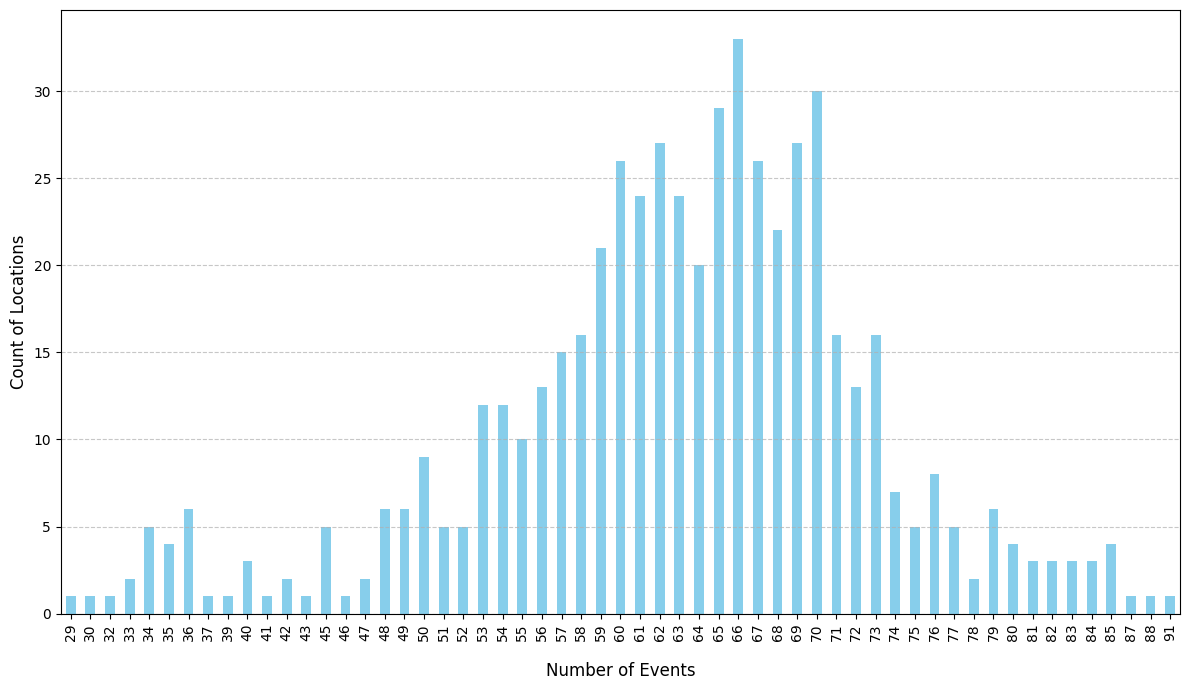

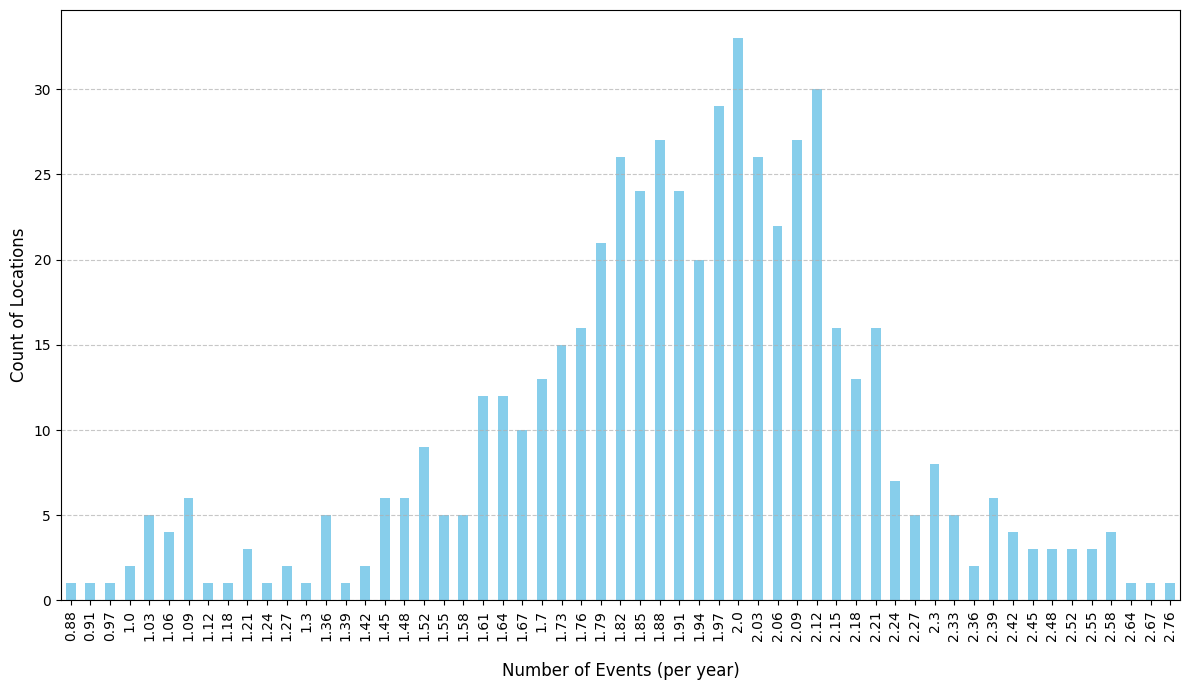

In [24]:
df_new = pd.read_csv("Tara_mhws_info.csv")




# # Sort the number of events Series by the index (the number of events)
# sorted_n_events = df_new['location'].value_counts().sort_index()


snusk = df_new.drop_duplicates(subset=['n_events', 'location'], inplace=False)

snusk = snusk.sort_values(by='n_events')
snusk = snusk[['n_events', 'location']]

print("snusk")
print(snusk)





# Sort the number of events Series by the index (the number of events)
sorted_n_events = snusk['n_events'].value_counts().sort_index()

# Plotting the distribution of heatwaves based on the number of events at each location
plt.figure(figsize=(12, 7))
sorted_n_events.plot(kind='bar', color='skyblue')

plt.title('')
plt.xlabel('Number of Events', fontsize=12, labelpad=15)
plt.ylabel('Count of Locations', fontsize=12)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()



import matplotlib.pyplot as plt

# Divide each value in n_events by 33
normalized_n_events = (snusk['n_events'] / 33).round(2)

# Sort the normalized number of events Series by the index (the number of events)
sorted_normalized_n_events = normalized_n_events.value_counts().sort_index()

# Plotting the distribution of heatwaves based on the normalized number of events at each location
plt.figure(figsize=(12, 7))
sorted_normalized_n_events.plot(kind='bar', color='skyblue')
plt.title('')
plt.xlabel('Number of Events (per year)', fontsize=12, labelpad=15)
plt.ylabel('Count of Locations', fontsize=12)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.savefig('/Users/annaolsen/Desktop/Speciale/DS_thesis/mhw_events_per_year.png', bbox_inches='tight', dpi=200)

plt.show()


(34969, 31)
91
64.53112757013355
29
9.447279884784786
Empty DataFrame
Columns: [time_start, time_end, time_peak, date_start, date_end, date_peak, index_start, index_end, index_peak, duration, duration_moderate, duration_strong, duration_severe, duration_extreme, intensity_max, intensity_mean, intensity_var, intensity_cumulative, intensity_max_relThresh, intensity_mean_relThresh, intensity_var_relThresh, intensity_cumulative_relThresh, intensity_max_abs, intensity_mean_abs, intensity_var_abs, intensity_cumulative_abs, category, rate_onset, rate_decline, n_events, location]
Index: []

[0 rows x 31 columns]
location
(-40.875, -51.625)    91
(79.625, 60.875)      88
(74.375, -85.625)     87
(73.875, -81.625)     85
(73.625, -89.125)     85
                      ..
(-5.125, -85.375)     33
(-10.625, -92.875)    33
(-10.875, -93.625)    32
(-5.375, -85.125)     30
(-5.375, -85.375)     29
Name: count, Length: 556, dtype: int64
Statistics for Normalized Number of Events (n_events / 33):
Mean:

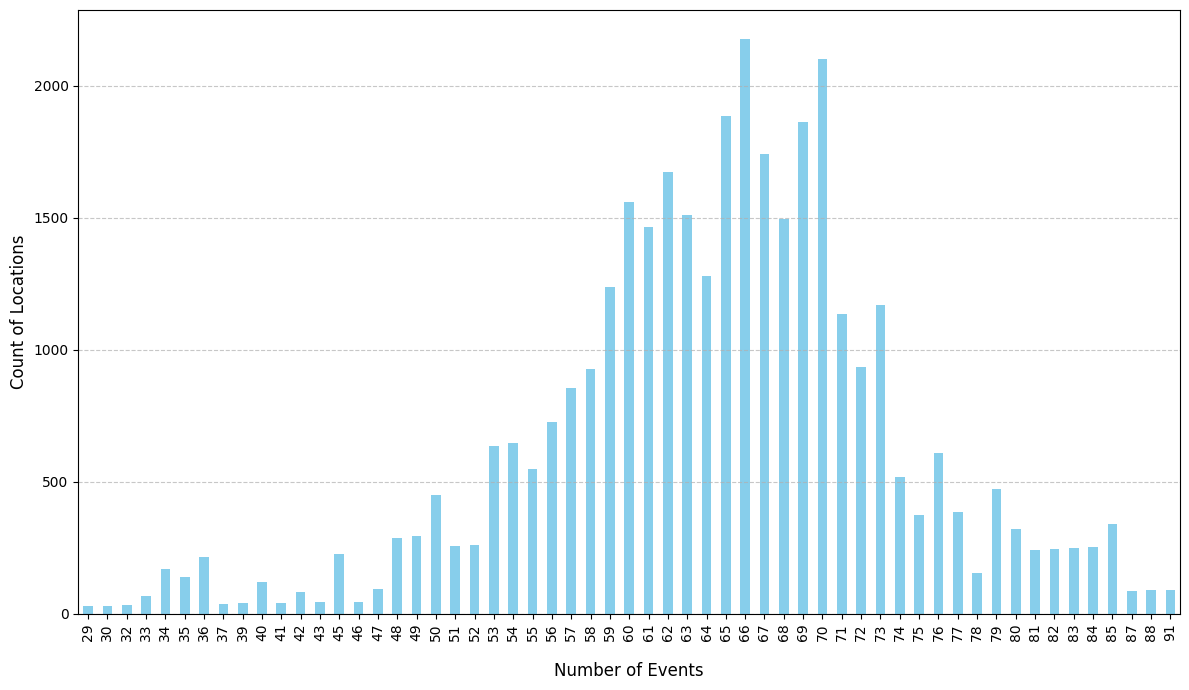

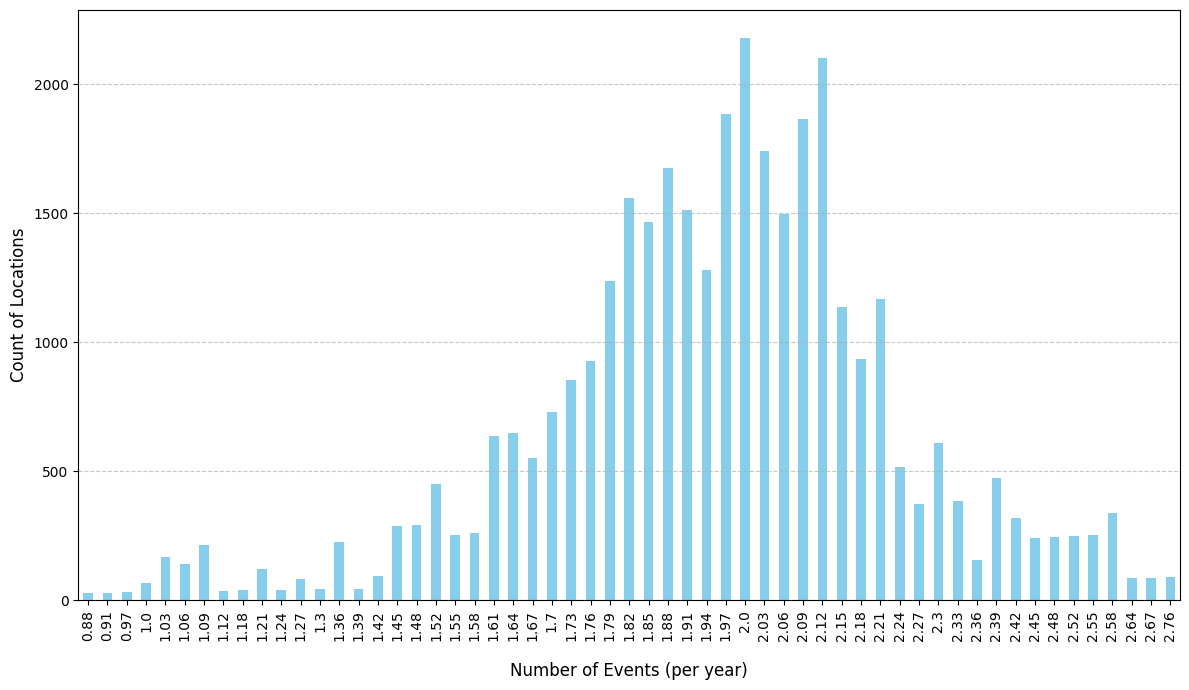

In [11]:
df_new = pd.read_csv("Tara_mhws_info.csv")
print(df_new.shape)

print(df_new['n_events'].max())
print(df_new['n_events'].mean())
print(df_new['n_events'].min())
print(df_new['n_events'].std())



# Sort the number of events Series by the index (the number of events)
sorted_n_events = df_new['location'].value_counts().sort_index()


snusk = df_new.drop_duplicates(subset=('n_events', 'location'), keep=False)


print("snusk")
print(snusk)







# Calculate the counts of each unique location
location_counts = df_new['location'].value_counts()

print(location_counts)
# # Extract locations with counts above 90
# locations_80 = location_counts[location_counts > 65].index.tolist()
# Extract locations with counts from 71 to 80
# locations_70_80 = location_counts[location_counts <= 65].index.tolist()
# Extract locations with counts from 51 to 60
# locations_51_60 = location_counts[location_counts <= 65].index.tolist()
# Extract locations with counts from 31 to 40
# locations_31_40 = location_counts[location_counts <= 65].index.tolist()


# Extract locations with counts from 81 and above
locations_81_up = location_counts[location_counts >= 81].index.tolist()

# Extract locations with counts from 71 to 80
locations_71_80 = location_counts[(location_counts > 70) & (location_counts <= 80)].index.tolist()

# Extract locations with counts from 61 to 70
locations_61_70 = location_counts[(location_counts > 60) & (location_counts <= 70)].index.tolist()

# Extract locations with counts from 51 to 60
locations_51_60 = location_counts[(location_counts > 50) & (location_counts <= 60)].index.tolist()

# Extract locations with counts from 41 to 50
locations_41_50 = location_counts[(location_counts > 40) & (location_counts <= 50)].index.tolist()

# Extract locations with counts from 29 to 40
locations_29_40 = location_counts[(location_counts > 20) & (location_counts <= 40)].index.tolist()



import matplotlib.pyplot as plt

# Sort the number of events Series by the index (the number of events)
sorted_n_events = df_new['n_events'].value_counts().sort_index()

# Plotting the distribution of heatwaves based on the number of events at each location
plt.figure(figsize=(12, 7))
sorted_n_events.plot(kind='bar', color='skyblue')
plt.title('')
plt.xlabel('Number of Events', fontsize=12, labelpad=15)
plt.ylabel('Count of Locations', fontsize=12)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()


plt.savefig('/Users/annaolsen/Desktop/Speciale/DS_thesis/mhws_n_events.png', bbox_inches='tight', dpi=200)

# print(df_new['n_events'].value_counts())



import matplotlib.pyplot as plt

# Divide each value in n_events by 33
normalized_n_events = (df_new['n_events'] / 33).round(2)

# Sort the normalized number of events Series by the index (the number of events)
sorted_normalized_n_events = normalized_n_events.value_counts().sort_index()

# Plotting the distribution of heatwaves based on the normalized number of events at each location
plt.figure(figsize=(12, 7))
sorted_normalized_n_events.plot(kind='bar', color='skyblue')
plt.title('')
plt.xlabel('Number of Events (per year)', fontsize=12, labelpad=15)
plt.ylabel('Count of Locations', fontsize=12)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

# Save the plot as an image
# plt.savefig('/Users/annaolsen/Desktop/Speciale/DS_thesis/mhw_events_per_year.png', bbox_inches='tight', dpi=200)

# Print the normalized number of events
# print(sorted_normalized_n_events)

# print(f"Min: {sorted_normalized_n_events.min()}")

# Calculate descriptive statistics for the normalized number of events
# statistics = sorted_normalized_n_events.describe()

# # Print the statistics
# print("Descriptive Statistics for Normalized Number of Events:")
# print(statistics)

# Calculate mean, max, min, and standard deviation for the normalized number of events
mean_normalized = normalized_n_events.mean()
max_normalized = normalized_n_events.max()
min_normalized = normalized_n_events.min()
std_normalized = normalized_n_events.std()

# Print the statistics
print("Statistics for Normalized Number of Events (n_events / 33):")
print(f"Mean: {mean_normalized:.2f}")
print(f"Max: {max_normalized:.2f}")
print(f"Min: {min_normalized:.2f}")
print(f"Standard Deviation: {std_normalized:.2f}")


/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_44509/2999603214.py:30: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


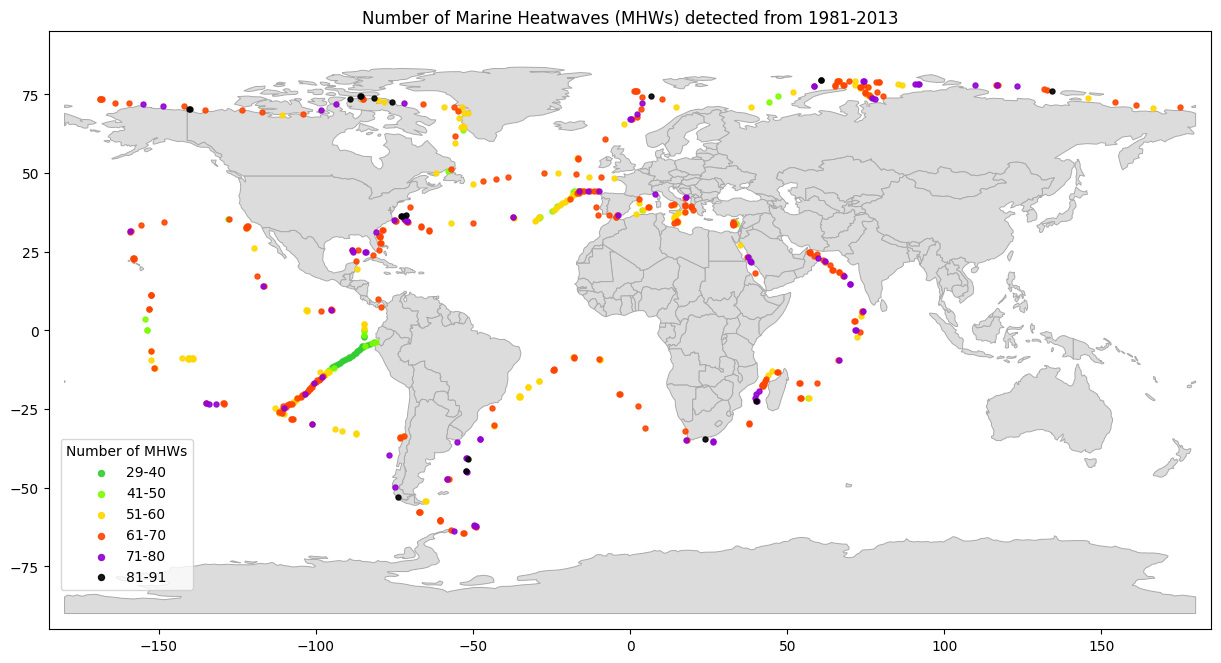

In [7]:
import pandas as pd

def extract_lat_lon(locations_list):

    locations_list = [eval(string) for string in locations_list]

    # Initialize lists to store latitude and longitude
    latitudes = []
    longitudes = []

    # Iterate over the set of tuples and extract latitude and longitude
    for location in locations_list:
        latitudes.append(location[0])
        longitudes.append(location[1])

    # Create DataFrame
    df_extracted = pd.DataFrame({'Latitude': latitudes, 'Longitude': longitudes})
    
    return df_extracted


df_below_40 = extract_lat_lon(locations_29_40)
df_41_50 = extract_lat_lon(locations_41_50)
df_51_60 = extract_lat_lon(locations_51_60)
df_61_70 = extract_lat_lon(locations_61_70)
df_71_80 = extract_lat_lon(locations_71_80)
df_above_81 = extract_lat_lon(locations_81_up)


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(15, 15))

# Plot world map
# world.plot(ax=ax, color='lightgray', edgecolor='grey', linewidth=0.8)
world.plot(ax=ax, color='gainsboro', edgecolor='darkgrey', linewidth=0.7)


# Plot closest match points
ax.scatter(df_below_40['Longitude'], df_below_40['Latitude'],
           color='limegreen', label='29-40', s=13, alpha=0.9)

# Plot original points
ax.scatter(df_41_50['Longitude'], df_41_50['Latitude'],
           color='lawngreen', label='41-50', s=13, alpha=0.9)

# Plot original points
ax.scatter(df_51_60['Longitude'], df_51_60['Latitude'],
           color='gold', label='51-60', s=13, alpha=0.9)

# Plot original points
ax.scatter(df_61_70['Longitude'], df_61_70['Latitude'],
           color='orangered', label='61-70', s=13, alpha=0.9)

# Plot original points
ax.scatter(df_71_80['Longitude'], df_71_80['Latitude'],
           color='darkviolet', label='71-80', s=13, alpha=0.9)

# Plot original points
ax.scatter(df_above_81['Longitude'], df_above_81['Latitude'],
           color='black', label='81-91', s=13, alpha=0.9)


# Set title
ax.set_title('Number of Marine Heatwaves (MHWs) detected from 1981-2013')

# Set x-axis limits
ax.set_xlim(-185, 185)
ax.set_ylim(-95, 95)

# Add legend
legend = ax.legend(title="Number of MHWs", markerscale=1.2)
legend.set_bbox_to_anchor((0.13, 0.33))  # Adjust the position of the legend (x, y)


# plt.show()
plt.savefig('/Users/annaolsen/Desktop/Speciale/DS_thesis/mhws_count_map.png', bbox_inches='tight', dpi=200)


Number of heatwaves for each year:
year
1981     199
1982    1046
1983    1060
1984     952
1985     484
1986     487
1987    1095
1988     621
1989     601
1990     699
1991     693
1992     638
1993     785
1994     650
1995     960
1996     578
1997    1344
1998    1491
1999     834
2000    1030
2001    1038
2002    1144
2003    1346
2004    1195
2005    1696
2006    1552
2007    1487
2008    1484
2009    1675
2010    1402
2011    1386
2012    1895
2013    1422
dtype: int64


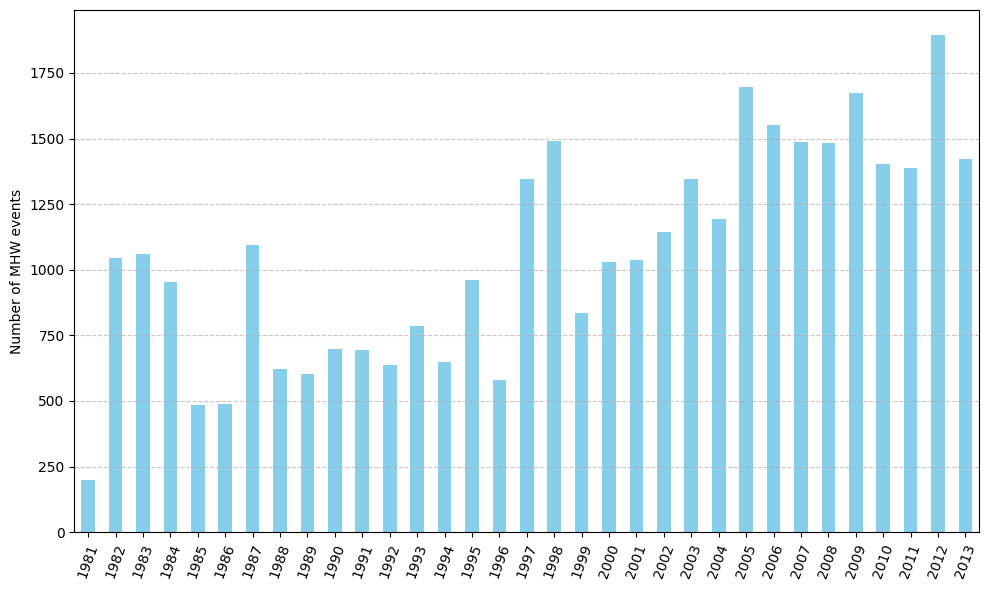

In [125]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'date_start' column to datetime if it's not already in datetime format
df_new['date_start'] = pd.to_datetime(df_new['date_start'])

# Extract year from 'date_start' column
df_new['year'] = df_new['date_start'].dt.year

# Count number of events per year
events_per_year = df_new.groupby('year').size()

# Print number of heatwaves for each year
print("Number of heatwaves for each year:")
print(events_per_year)

# Plot number of events per year
plt.figure(figsize=(10, 6))
events_per_year.plot(kind='bar', color='skyblue')
plt.title('')
plt.xlabel('')
plt.ylabel('Number of MHW events')
plt.xticks(rotation=70, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.show()

plt.savefig('/Users/annaolsen/Desktop/Speciale/DS_thesis/mhws_tara_count.png', bbox_inches='tight', dpi=200)


Let's have a look at some properties of the event with the largest maximum intensity

In [35]:
ev = np.argmax(df_new['intensity_max'])
print('Maximum intensity:', df_new['intensity_max'][ev], 'deg. C')
print('Average intensity:', df_new['intensity_mean'][ev], 'deg. C')
print('Cumulative intensity:', df_new['intensity_cumulative'][ev], 'deg. C-days')
print('Duration:', df_new['duration'][ev], 'days')
print('Start date:', df_new['date_start'][ev])
print('End date:', df_new['date_end'][ev])

print(df_new['location'][ev])

Maximum intensity: 10.946830153436492 deg. C
Average intensity: 7.001817052383494 deg. C
Cumulative intensity: 147.03815810005338 deg. C-days
Duration: 21 days
Start date: 2013-08-03
End date: 2013-08-23
(68.375, -110.875)


And a closer look at the identified MHW event:

sst: 11810, t: 11810
-1.8 -0.21967484533378495 14.46 2.19239044097343
52
<class 'datetime.date'>


(15451.0, 16051.0)

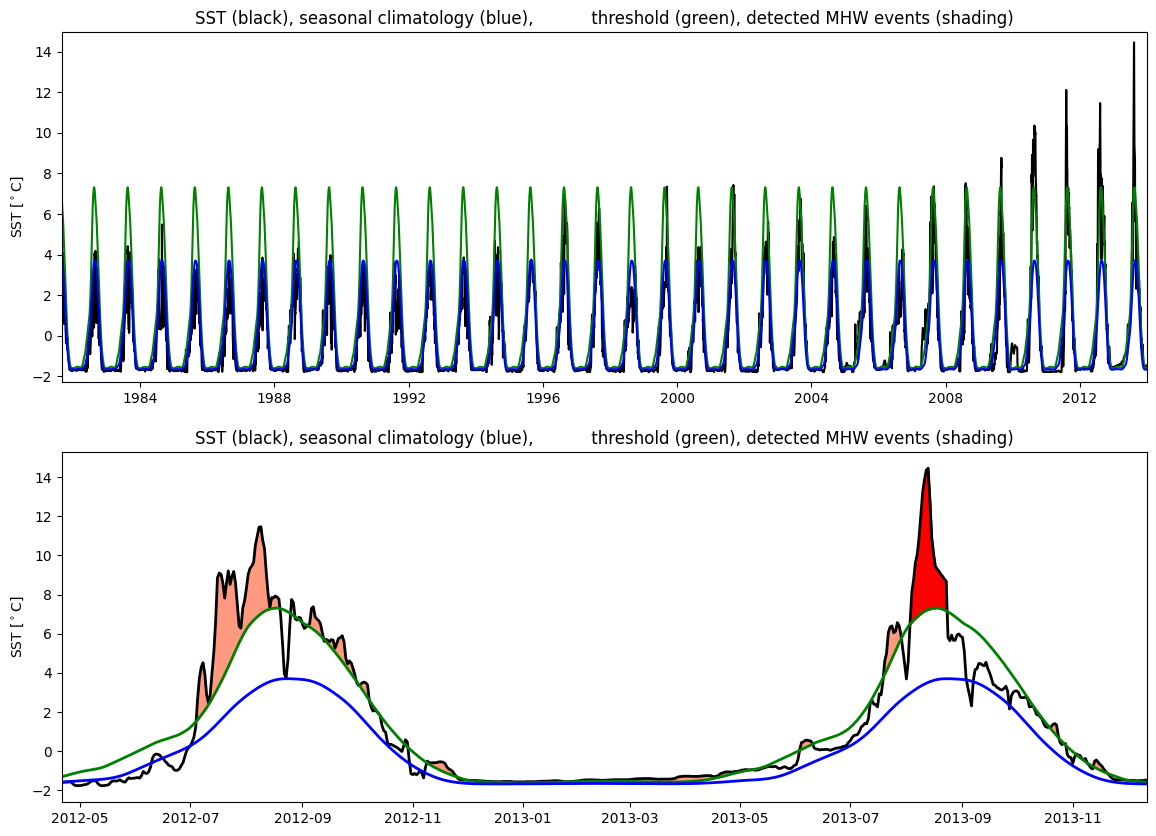

In [38]:
intense_loc_df = df[df['location'] == (68.375, -110.875)]

intense_loc_df = intense_loc_df.sort_values(by='date')

sst = list(intense_loc_df['temp'])


# Convert nested SST values into a one-dimensional array 
sst = np.array(sst).flatten()

print(f"sst: {len(sst)}, t: {len(t)}")

print(sst.min(), sst.mean(), sst.max(), sst.std())

# Use mhw function from marineHeatWaves.py
mhws, clim = mhw.detect(t, sst)


ev = np.argmax(mhws['intensity_max'])
print(ev)



plt.figure(figsize=(14,10))
plt.subplot(2,1,1)

# Plot SST, seasonal cycle, and threshold
plt.plot(dates, sst, 'k-')
plt.plot(dates, clim['thresh'], 'g-')
plt.plot(dates, clim['seas'], 'b-')
plt.title('SST (black), seasonal climatology (blue), \
          threshold (green), detected MHW events (shading)')
plt.xlim(dates[0], dates[-1])
plt.ylim(sst.min()-0.5, sst.max()+0.5)
plt.ylabel(r'SST [$^\circ$C]')
plt.subplot(2,1,2)

# Find indices for all ten MHWs before and after event of interest and shade accordingly
for ev0 in np.arange(max(ev-10,0), min(ev+11,len(mhws['time_start'])), 1):
    try:
        t1 = np.where(t==mhws['time_start'][ev0])[0][0]
        # print(t1)
        t2 = np.where(t==mhws['time_end'][ev0])[0][0]
        # print(t2)
        plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], clim['thresh'][t1:t2+1], \
                        color=(1,0.6,0.5))
    except:
        print(f"{ev0} had no match")
# Find indices for MHW of interest and shade accordingly
t1 = np.where(t==mhws['time_start'][ev])[0][0]
t2 = np.where(t==mhws['time_end'][ev])[0][0]
plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], clim['thresh'][t1:t2+1], \
                 color='r')

# Plot SST, seasonal cycle, threshold, shade MHWs with main event in red
plt.plot(dates, sst, 'k-', linewidth=2)
plt.plot(dates, clim['thresh'], 'g-', linewidth=2)
plt.plot(dates, clim['seas'], 'b-', linewidth=2)
plt.title('SST (black), seasonal climatology (blue), \
          threshold (green), detected MHW events (shading)')
# plt.xlim(mhws['time_start'][ev]-150, mhws['time_end'][ev]+150)
# plt.xlim(dates[ev]-150, dates[ev]+150)

# plt.ylim(clim['seas'].min() - 1, clim['seas'].max() + mhws['intensity_max'][ev] + 0.5)
plt.ylabel(r'SST [$^\circ$C]')
print(type(dates[0]))

stop_date = np.datetime64(datetime(2013,12,12))
start_date = stop_date - np.timedelta64(600, 'D')
plt.xlim(start_date, stop_date)

Yep, It's certainly picked out the largest event in the series (dark red shading). This event also seems to have been preceded and succeeded by a number of shorter, weaker events (light red shading). Let's have a look at how the MHW statistics are distributed across all the detected events:

Text(0.5, 0, 'MHW event number')

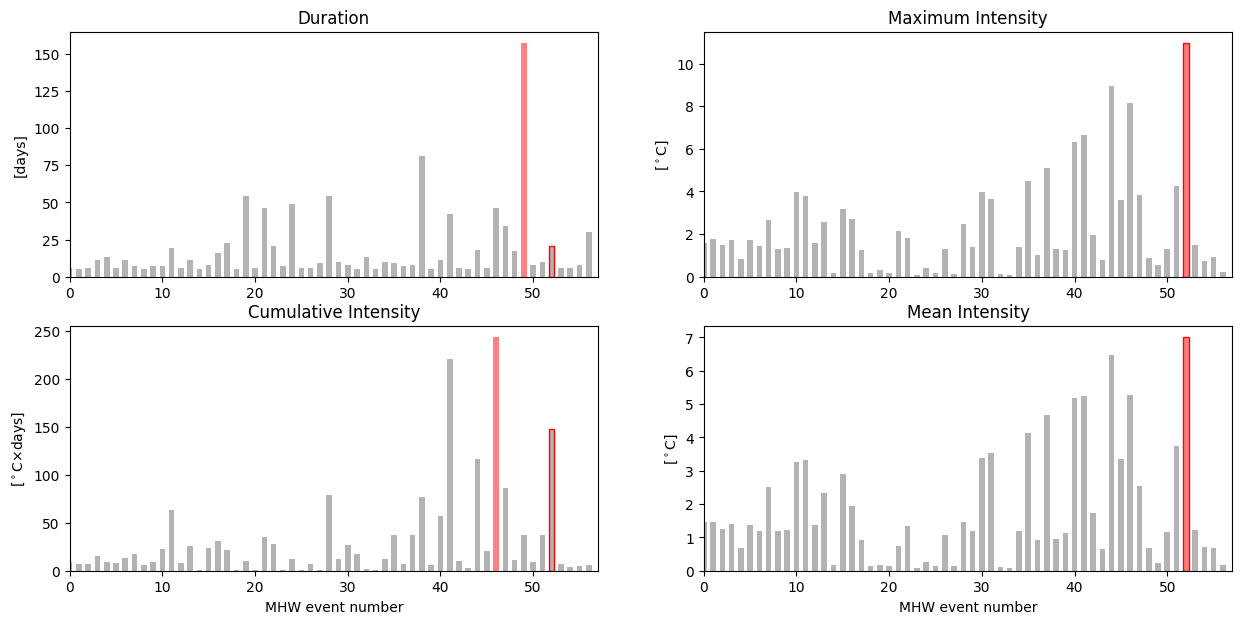

In [39]:
plt.figure(figsize=(15,7))
# Duration
plt.subplot(2,2,1)
evMax = np.argmax(mhws['duration'])
plt.bar(range(mhws['n_events']), mhws['duration'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws['duration'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws['duration'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws['n_events'])
plt.ylabel('[days]')
plt.title('Duration')

# Maximum intensity
plt.subplot(2,2,2)
evMax = np.argmax(mhws['intensity_max'])
plt.bar(range(mhws['n_events']), mhws['intensity_max'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws['intensity_max'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws['intensity_max'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws['n_events'])
plt.ylabel(r'[$^\circ$C]')
plt.title('Maximum Intensity')

# Mean intensity
plt.subplot(2,2,4)
evMax = np.argmax(mhws['intensity_mean'])
plt.bar(range(mhws['n_events']), mhws['intensity_mean'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws['intensity_mean'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws['intensity_mean'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws['n_events'])
plt.title('Mean Intensity')
plt.ylabel(r'[$^\circ$C]')
plt.xlabel('MHW event number')

# Cumulative intensity
plt.subplot(2,2,3)
evMax = np.argmax(mhws['intensity_cumulative'])
plt.bar(range(mhws['n_events']), mhws['intensity_cumulative'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws['intensity_cumulative'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws['intensity_cumulative'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws['n_events'])
plt.title(r'Cumulative Intensity')
plt.ylabel(r'[$^\circ$C$\times$days]')
plt.xlabel('MHW event number')

The red shaded bars show the largest event on record by duration, maximum intensity, cumulative intensity, and mean intensity, while the red-outlined bars show the specific event chosen above (which happens to be largest by maximum intensity). We can see how this event ranks according to the other metrics as follows:

In [40]:
rank, returnPeriod = mhw.rank(t, mhws)
print("The 2012 NWA event is ranked number " \
        + str(rank['duration'][ev]) + " by duration")
print("The 2012 NWA event is ranked number " \
        + str(rank['intensity_max'][ev]) + " by maximum intensity")
print("The 2012 NWA event is ranked number " \
        + str(rank['intensity_mean'][ev]) + " by mean intensity")
print("The 2012 NWA event is ranked number " \
        + str(rank['intensity_cumulative'][ev]) + " by cumulative intensity")

The 2012 NWA event is ranked number 13 by duration
The 2012 NWA event is ranked number 1 by maximum intensity
The 2012 NWA event is ranked number 1 by mean intensity
The 2012 NWA event is ranked number 3 by cumulative intensity


We can even look at the return periods for events with those properties:

In [41]:
print("The return period for an event with this duration was " \
        + str(returnPeriod['duration'][ev]) + " years")
print("The return period for an event with this maximum intensity was " \
        + str(returnPeriod['intensity_max'][ev]) + " years")
print("The return period for an event with this mean intensity was " \
        + str(returnPeriod['intensity_mean'][ev]) + " years")
print("The return period for an event with this cumulative intensity was " \
        + str(returnPeriod['intensity_cumulative'][ev]) + " years")

The return period for an event with this duration was 2.5641552150792397 years
The return period for an event with this maximum intensity was 33.33401779603012 years
The return period for an event with this mean intensity was 33.33401779603012 years
The return period for an event with this cumulative intensity was 11.111339265343373 years


## Block-averaged Marine Heatwave properties

The marineHeatWaves (`mhw`) module also consists of functions to calculate the average of MHW properties over blocks in time (e.g., annually, decadally). The block-averaging function (`blockAverage`) takes as input a set of detected MHWs (i.e., the output from `detect`, the detection function described above) and outputs the MHW properties averaged over the specified block-length. This output can then be passed through the `meanTrend` function in order to calculate the time-mean and linear trend of the MHW properties over the measurement period.

Let's start by applying the block-averaging function to the Mediterranean MHWs which are stored in the variable `mhws`, using the default block length of 1 year (i.e., annual averages):

In [42]:
mhwBlock = mhw.blockAverage(t, mhws)

The variable `mhwBlock` has a set of keys which are time series of the MHW properties over the blocks. The central year of the blocks are stored in the key `years_centre` so we can look at, as an example, time series of MHW counts in each year and the average maximum intensity in each year:


Text(0.5, 1.0, 'Average MHW maximum intensity by year')

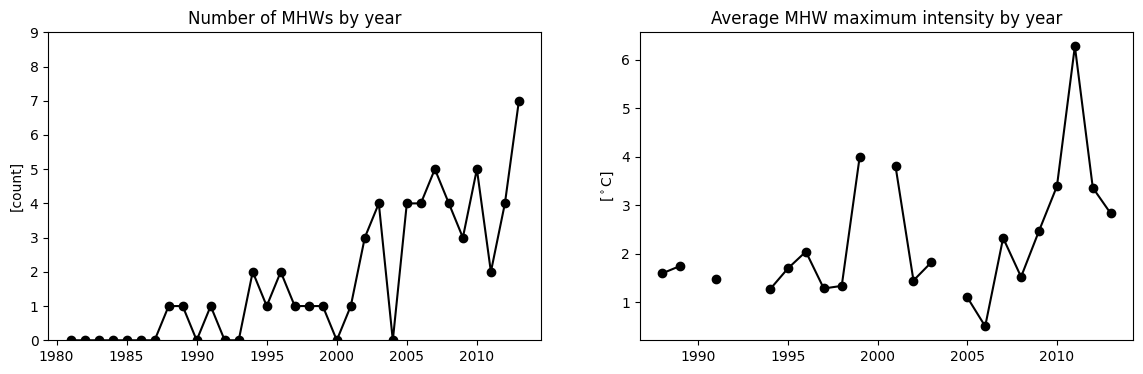

In [43]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(mhwBlock['years_centre'], mhwBlock['count'], 'k-o')
plt.ylim(0,9)
plt.ylabel('[count]')
plt.title('Number of MHWs by year')
plt.subplot(1,2,2)
plt.plot(mhwBlock['years_centre'], mhwBlock['intensity_max'], 'k-o')
plt.ylabel(r'[$^\circ$C]')
plt.title('Average MHW maximum intensity by year')

We can calculate the mean and trend of the MHW properties using the `meanTrend` function:

In [44]:
mean, trend, dtrend = mhw.meanTrend(mhwBlock)
print("There are on average " + str(mean['count']) + " MHWs in each year, \n \
with a linear trend of " + str(10*trend['count']) + " MHW events per decade \n \
This trend is statistically significant (p<0.05): " \
+ str(np.abs(trend['count']) > dtrend['count']) + "\n")

print("The average maximum intensity is " + str(mean['intensity_max']) + " deg. C, \n \
with a linear trend of " + str(10*trend['intensity_max']) + " deg. C per decade \n \
This trend is statistically significant (p<0.05): " \
+ str(np.abs(trend['intensity_max']) > dtrend['intensity_max']))

There are on average 1.7272727272727266 MHWs in each year, 
 with a linear trend of 1.5909090909090906 MHW events per decade 
 This trend is statistically significant (p<0.05): True

The average maximum intensity is 1.911666140156106 deg. C, 
 with a linear trend of 0.7452499246881743 deg. C per decade 
 This trend is statistically significant (p<0.05): True
